<a href="https://colab.research.google.com/github/piyushy1/DeepLearningNotes/blob/master/Note3_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Derivatives and Differentiation**

Suppose that we have a function  f:R→R , whose input and output are both scalars. The derivative of  f  is defined as

f′(x)=limh→0f(x+h)−f(x)/h

let us experiment with an example. Define  u=f(x)=3x2−4x .

In [4]:
!pip install torch==1.5.0 torchvision
!pip install -U d2l -f https://d2l.ai/whl.html

Looking in links: https://d2l.ai/whl.html
     |████████████████████████████████| 40kB 4.7MB/s 
  Found existing installation: d2l 0.12.0
    Uninstalling d2l-0.12.0:
      Successfully uninstalled d2l-0.12.0


In [0]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
import numpy as np

In [0]:
def f(x):
  return (3*x**2 - 4*x)

def lim(f,x,h):
  return (f(x+h)-f(x))/h

In [9]:
h = 0.1
# test for x =1
for i in range(10):
    print('h=%.5f, numerical limit=%.5f' % (h, lim(f, 1, h)))
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000
h=0.00000, numerical limit=2.00000


Let us familiarize ourselves with a few equivalent notations for derivatives. Given  y=f(x) , where  x  and  y  are the independent variable and the dependent variable of the function  f , respectively. The following expressions are equivalent:

(2.4.2)
f′(x)=y′=dy/dx=df/dx=d/dxf(x)=Df(x)=Dxf(x),
 
where symbols  ddx  and  D  are differentiation operators that indicate operation of differentiation. We can use the following rules to differentiate common functions:

DC=0  ( C  is a constant),

Dxn=nxn−1  (the power rule,  n  is any real number),

Dex=ex ,

Dln(x)=1/x.

In [0]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [0]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data instances."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (ndarray or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

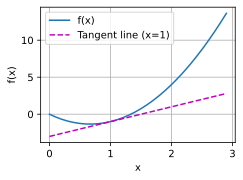

In [12]:
#Now we can plot the function  u=f(x)  and its tangent line  y=2x−3  at  x=1 , where the coefficient  2  is the slope of the tangent line.
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

**Partial Derivative and Gradients**

The above fxn was for single variable but there can be multiple valriables in DL (multivriate fxn) thus we need partial differentiation. Its like f(x1,x2,x3,......xn) = lim(->0) f(x1,x2,xi+h, xi+1,xn)- f(x1,x2,...xn)/h where all other varialbles will be treated as constant except xi. 

**Gardient Vector**: Partial derivative for all variables from x1 to xn will return gradient vector.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi mathvariant="normal">&#x2207;<!-- ∇ --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mrow class="MJX-TeXAtom-ORD">
        <mi mathvariant="bold">x</mi>
      </mrow>
    </mrow>
  </msub>
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mrow class="MJX-TeXAtom-ORD">
    <mi mathvariant="bold">x</mi>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mstyle scriptlevel="0">
    <mrow class="MJX-TeXAtom-ORD">
      <mo maxsize="2.047em" minsize="2.047em">[</mo>
    </mrow>
  </mstyle>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
      <mi>f</mi>
      <mo stretchy="false">(</mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mi mathvariant="bold">x</mi>
      </mrow>
      <mo stretchy="false">)/</mo>
    </mrow>
    <mrow>
      <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
      <msub>
        <mi>x</mi>
        <mn>1</mn>
      </msub>
    </mrow>
  </mfrac>
  <mo>,</mo>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
      <mi>f</mi>
      <mo stretchy="false">(</mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mi mathvariant="bold">x</mi>
      </mrow>
      <mo stretchy="false">)/</mo>
    </mrow>
    <mrow>
      <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
      <msub>
        <mi>x</mi>
        <mn>2</mn>
      </msub>
    </mrow>
  </mfrac>
  <mo>,</mo>
  <mo>&#x2026;<!-- … --></mo>
  <mo>,</mo>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
      <mi>f</mi>
      <mo stretchy="false">(</mo>
      <mrow class="MJX-TeXAtom-ORD">
        <mi mathvariant="bold">x</mi>
      </mrow>
      <mo stretchy="false">)/</mo>
    </mrow>
    <mrow>
      <mi mathvariant="normal">&#x2202;<!-- ∂ --></mi>
      <msub>
        <mi>x</mi>
        <mi>n</mi>
      </msub>
    </mrow>
  </mfrac>
  <msup>
    <mstyle scriptlevel="0">
      <mrow class="MJX-TeXAtom-ORD">
        <mo maxsize="2.047em" minsize="2.047em">]</mo>
      </mrow>
    </mstyle>
    <mi mathvariant="normal">&#x22A4;<!-- ⊤ --></mi>
  </msup>
  <mo>,</mo>
</math>

**Chain Rule**

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>d</mi>
      <mi>y/</mi>
    </mrow>
    <mrow>
      <mi>d</mi>
      <mi>x</mi>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>d</mi>
      <mi>y/</mi>
    </mrow>
    <mrow>
      <mi>d</mi>
      <mi>u*</mi>
    </mrow>
  </mfrac>
  <mfrac>
    <mrow>
      <mi>d</mi>
      <mi>u/</mi>
    </mrow>
    <mrow>
      <mi>d</mi>
      <mi>x</mi>
    </mrow>
  </mfrac>
  <mo>.</mo>
</math>

**Automatic Differentiation**

y=2x⊤x  

In [24]:
import torch
x = torch.arange(4.0, requires_grad=True) # to updte same param as we need to update this millions of time and creating copy will error out of memory
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [25]:
x.grad
print(x.grad)

None


In [26]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [0]:
y.backward()


In [28]:
x.grad
print(x.grad)

tensor([ 0.,  4.,  8., 12.])


In [29]:
y.backward()

RuntimeError: ignored

In [11]:
x.grad.zero_()
print(x)
y = x * x
print(y)
u = y.detach()
print(u)
z = u * x
print(z)

z.sum().backward()
x.grad == u

tensor([0., 1., 2., 3.], requires_grad=True)
tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 1., 4., 9.])
tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)


tensor([True, True, True, True])

In [0]:
def f(a):
    b = a * 2
    while b.norm().item() < 1000:
        b = b * 2
    if b.sum().item() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [16]:
a = torch.randn(size=(1,), requires_grad=True)
print(a)
d = f(a)
print(d)
d.backward()
print(a)

tensor([-0.1374], requires_grad=True)
tensor([-112569.8828], grad_fn=<MulBackward0>)
tensor([-0.1374], requires_grad=True)


In [18]:
a.grad == d/a

tensor([True])